<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Completed: 17/9

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
house = pd.read_csv(house_csv)
house.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [4]:
# ANSWER
# Target variable is the Price.  (which is the Y)
Y = house['price']

#### 2.2 List all possible variables which might be Predictor variable.

In [5]:
# ANSWER
X = house['baths']

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [6]:
# ANSWER
house.corr()


,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [11]:
# ANSWER

house['y_hat'] = house['price'].mean()

In [13]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [14]:
# ANSWER
# Absolute value = Actual Value Y - Predicted Value X
resudals = abs(house['price']-house['y_hat']).mean()

In [16]:
resudals

103452.16956891476

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [15]:
X = house['sq__ft']
Y = house['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [17]:
# ANSWER
def Beta_1(X,Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    
    n = np.sum((Y - y_bar)*(X - x_bar))
    d = np.sum(np.square(X - x_bar))
    
    beta_1 = n/d
    
    return beta_1

In [18]:
beta_1 = Beta_1(X,Y)
beta_1


54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [19]:
# ANSWER
def Beta_0(X,Y):
    
    x_bar = X.mean()
    y_bar = Y.mean()
    
    beta_0 = y_bar - Beta_1(X,Y) * x_bar
    
    return beta_0

In [20]:
beta_0 = Beta_0(X,Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [21]:
# ANSWER
yhat = beta_0 + beta_1 * X
yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [22]:
# ANSWER
res = Y - yhat
res

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [23]:
# ANSWER
def total_sum_of_squares(Y):
    y_bar = Y.mean()
    SS_tot = np.sum(np.square(Y - y_bar))
    
    return SS_tot

In [24]:
def residual_sum_of_square(Y, yhat):
    SS_res = np.sum(np.square(Y - yhat))
    
    return SS_res

In [25]:
def R_2(Y, yhat):
    SStot = total_sum_of_squares(Y)
    SSres = residual_sum_of_square(Y,yhat)
    R_square = 1 - (SSres/SStot)
    
    return R_square

In [26]:
R_2(Y, yhat)

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

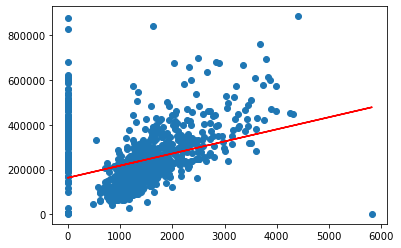

In [29]:
# ANSWER

ax = plt. gca()
ax.scatter(X,Y)
ax.plot(X, yhat, color = 'r')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

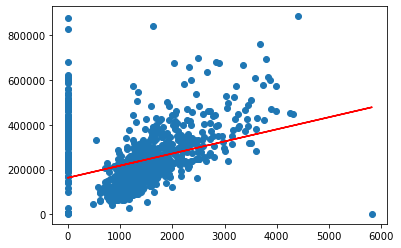

In [30]:
# ANSWER
ax = plt. gca()
ax.scatter(X,Y)
ax.plot(X, yhat, color = 'r')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [31]:
# ANSWER
x  = 1204

In [33]:
beta_0

162930.16140699777

In [32]:
beta_1

54.158639688530755

In [34]:
y_pred = beta_1 * x + beta_0
y_pred

228137.1635919888



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



